<h1>K-Medians<h1>
<h3>Escolher os centroides</h3>
<h3>Agruparas amostras para o cluster</h3>
<h3>Atualiza o valor dos centróides dos clusters</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 

style.use('ggplot')

In [2]:
data = pd.read_csv('bairros.csv')
data.head()

,Bairro,Latitude,Longitude
0,Marco,-1.433727,-48.461617
1,Cidade Velha,-1.459614,-48.505799
2,Batista Campos,-1.459672,-48.489818
3,Nazaré,-1.452286,-48.481252
4,Umarizal,-1.439096,-48.483710


In [36]:
def lat_lon(i):
    lat = data.loc[i, 'Latitude']
    lon = data.loc[i, 'Longitude']
    return lat, lon

In [37]:
centroids = {0: lat_lon(13)}
k = 4
shape = data.shape[0]

In [38]:
#distancia euclidiana
def eucDistance(xa,xb,ya,yb):
    dist = np.sqrt((float(xa)-float(xb))**2 + (float(ya)-float(yb))**2)
    return dist

In [57]:
# Inicializa e distingue os centroides entre si
# 13 equivale ao bairro de Val-de-Caes
while len(centroids) < 4:
    amostra = int(np.random.randint(shape))
    if amostra == 13: continue
    centroids[len(centroids)] = lat_lon(amostra)
print(centroids)

{0: (-1.3950055417506055, -48.47191222722505), 1: (-1.4531646344508171, -48.463395858386036), 2: (-1.4586479816143287, -48.48981764464487), 3: (-1.4114035009132684, -48.48294524073052)}


In [58]:
# Dicionario que guarda as classes geradas
# Cada chave ́e o valor da classe, 0-3 (4 centroides)
# Cada valor ́e uma lista com seus pontos associados
for j in range(500):   
    classes = {i: [] for i in range(k)}
    # Percorre cada amostra
    for amostra in range(shape):
        distancias = []
        for _, lat_lon_centroid in centroids.items():
            lat_centroid, lon_centroid = lat_lon_centroid
            lat_amostra, lon_amostra = lat_lon(amostra)
            distancias.append(eucDistance(lat_amostra,lat_centroid, lon_amostra, lon_centroid))
            centroid = distancias.index(min(distancias))
            classes[centroid].append(amostra)
    # Atualiza os centroides
    for classe in classes:
        if classe == 0: continue
        lats, lons = lat_lon(classes[classe])
        lat = np.median(lats)
        lon = np.median(lons)
        centroids[classe] = (lat, lon)
print(centroids)    
print(classes)

{0: (-1.3950055417506055, -48.47191222722505), 1: (-1.4531646344508171, -48.463395858386036), 2: (-1.4586479816143287, -48.48981764464487), 3: (-1.4114035009132684, -48.48294524073052)}
{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 20, 21, 22, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36, 37, 37, 37, 38, 38, 38], 1: [0, 0, 0, 1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 8, 8, 10, 10, 10, 16, 16, 16, 19, 20, 21, 22, 22, 22, 23, 23, 23, 36, 36, 36], 2: [1, 1, 2, 2, 3, 3, 4, 4, 6, 6, 7, 7, 19, 19, 20, 20, 21, 21], 3: [32, 33, 35, 37, 38]}


In [59]:
# Guarda a distância total
total_dist = 0
for _, lat_lon_centroid in centroids.items():
    lat_centroid, lon_centroid = lat_lon_centroid
    for amostra in range(shape):
        lat_amostra, lon_amostra = lat_lon(amostra)
        total_dist += eucDistance(lat_amostra,lat_centroid, lon_amostra, lon_centroid)
print(total_dist)

7.85764541184515


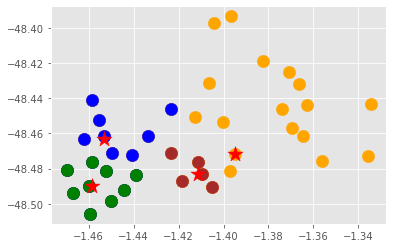

In [60]:
colors=['orange', 'blue', 'green','brown']
for i in range(shape):    
    for classe in classes:
        if i in classes[classe]: plt.scatter(data.at[i,'Latitude'], data.at[i,'Longitude'],s=150, c = colors[classe])
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1], marker='*', c='r', s=250)